### Basics and Recap

Survival analysis is also called duration analysis, transition analysis, failure time analysis, and time-to-event analysis.Survival analysis is applied when the data set includes subjects that are tracked until an event happens (failure) or we lose them from the sample.

Survival analysis will help us to know, how long they stay in the sample (survival), to know the risk of failure (hazard rates).

The dependent variable is duration (time to event or time to being censored),so it is a combination of time and event/censoring. The dependent variable duration is assumed to have a continuous probability distribution ݂f(t).

In survival analysis we have two functions
1. Survival Function : Survival means, the probability that the duration will be at least t before the event of failure/death occurs.
    Survival Function = 1- prob(T<=t)
    
2. Hazard Function : The hazard rate is the probability that the event will happen at time t given that the individual is at risk at time t.
    
    Hazard Function =  f(t)/S(t)
    
For a given instance i, survival fuctions is represented using a Triplet.
    (Independent Variables, Dependent Variable, Censored instances)
    
The three main elements are:
1. The dependent variable or response is the waiting time until the occurrence of a well-defined event
2. Few observations are censored, in the sense that for some units the event of interest has not occurred at the time the data are analyzed, and 
3. There are predictors or explanatory variables whose effect on the waiting time we wish to assess or control.

### Survival Analysis to Understand Customer Retention

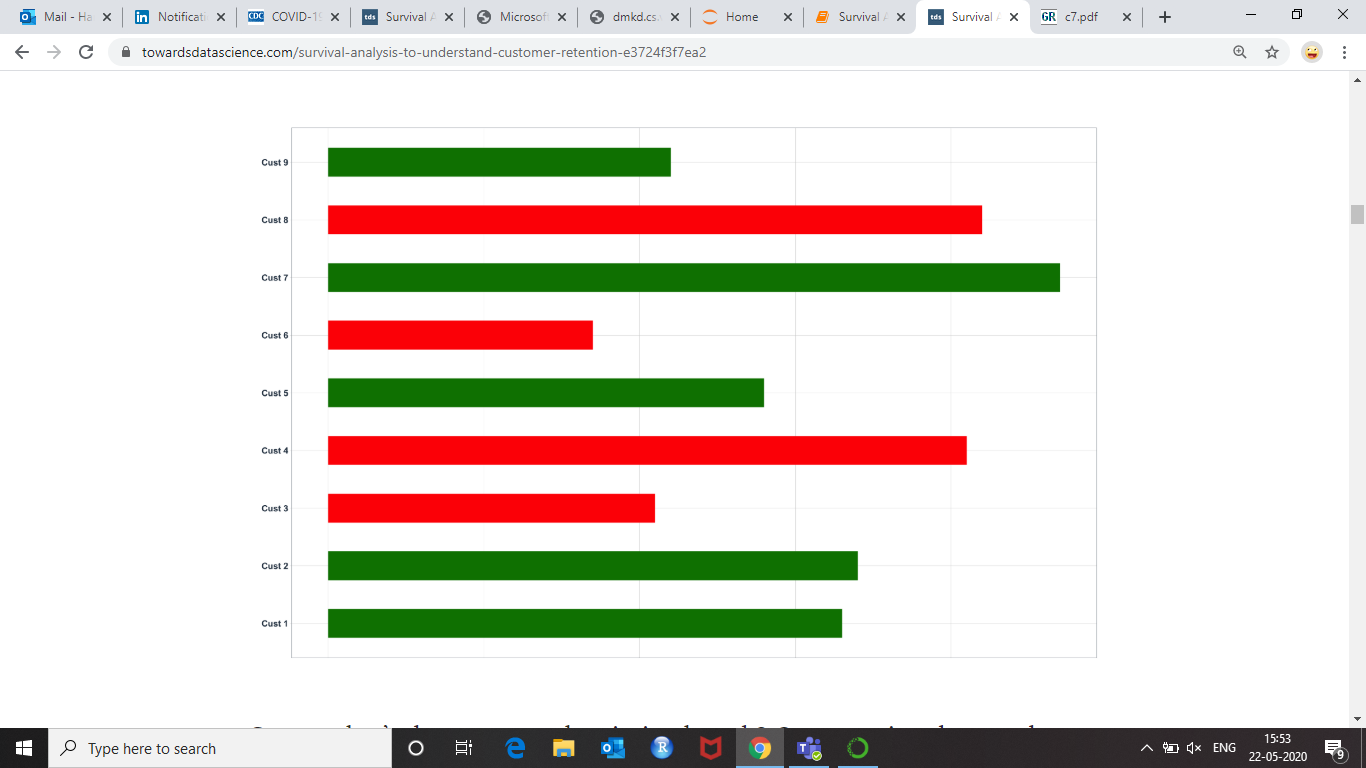

In the picture above we are looking at 9 customers and their average subscription length. All the green bars show active customers and all the red bars show the inactive customers.

1. what’s the average subscription length?
2. What if one takes average subscription length next month, probably going to to get totally different. Essentially, its s a moving target we are trying to look at.

Below are the steps I follow in general to build an Machine Learning Model:

    Step-1: Exploratory Data Analysis
    Step-2: Feature Engineering
    Step-3: Data Modelling
    Step-4: Data Validation
    Step-5: Model Deployment 

In [123]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [184]:
df = pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [185]:
## Also we can use df.sample(10) to randomly display any 10 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [186]:
df.shape

(7043, 21)

In [187]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [189]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Variable Segmentation

Unique IDS:
    1.  customerID

Categorical Variable:
    1. Gender
    2. SeniorCitizen
    3. Partner
    4. Dependents
    5. PhoneService
    6. MultipleLines
    7. InternetService
    8. OnlineSecurity
    9. OnlineBackup
    10. DeviceProtection
    11. TechSupport
    12. StreamingTV
    13. StreamingMovies
    14. Contract
    15. PaperlessBilling
    16. PaymentMethod
  
    
Continuous Variables:
    1. Monthly Charges
    2. Yearly Charges
    3. Tenure : Number of months the cusotomer has stayed with the company
    
Dependent Variable:
    1.  Churn

## Exploratory Data Analysis

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Target Variable : Churn

In [191]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [192]:
df['Churn']=df['Churn'].apply(lambda x: 'Active' if x == 'No' else 'Churn' )

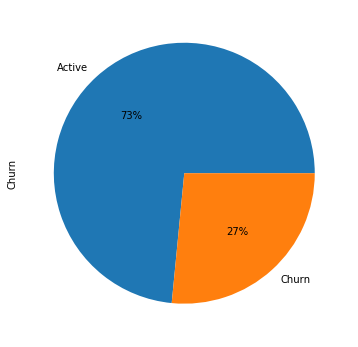

In [193]:
df['Churn'].value_counts().plot.pie(autopct='%1.0f%%')

#### Effect of Gender, Senior Citizen, Partner, Dependents on Churn

Text(0.5, 1.0, 'Dependents')

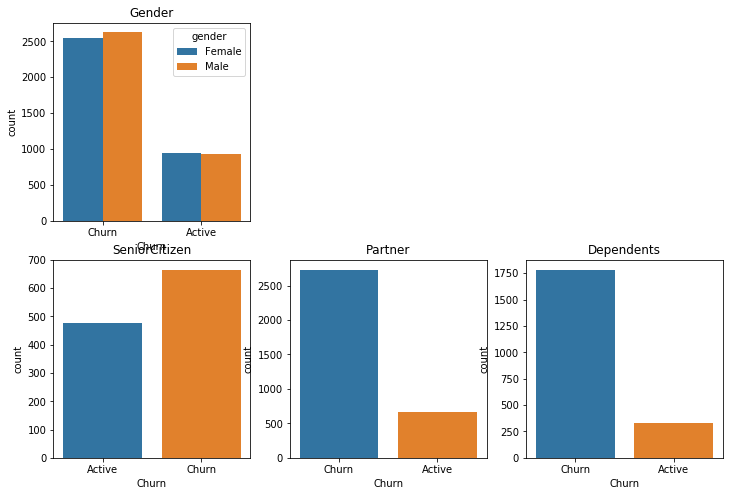

In [134]:
plt.rcParams['figure.figsize'] = (12, 8)

data_1 = df[df['SeniorCitizen'] == 1]
data_2 = df[df['Partner'] == 'Yes']
data_3 = df[df['Dependents'] == 'Yes']


#CountPlot
#(2,1,1) indicates total number of rows, columns, and figure number respectively

plt.subplot(2, 3, 1)
sns.countplot(x="Churn", hue="gender", data=df)
plt.title('Gender')

plt.subplot(2, 3, 4)
sns.countplot(x="Churn", data=data_1)
plt.title('SeniorCitizen')

plt.subplot(2, 3, 5)
sns.countplot(x="Churn", data=data_2)
plt.title('Partner')

plt.subplot(2, 3, 6)
sns.countplot(x="Churn", data=data_3)
plt.title('Dependents')

#### Effect of PhoneService, MultipleLines, InternetService on Churn

Text(0.5, 1.0, 'InternetService')

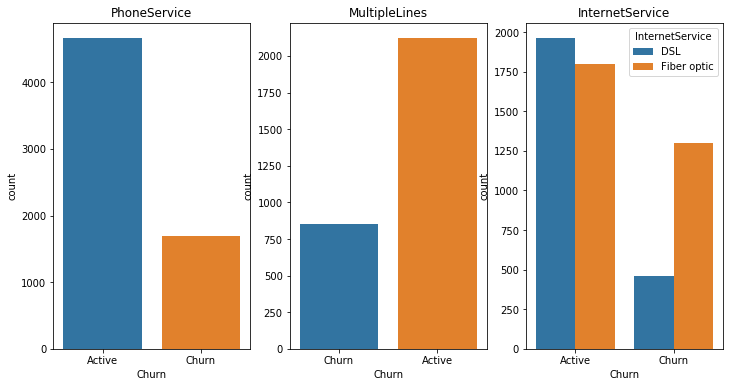

In [194]:
plt.rcParams['figure.figsize'] = (12, 6)

data_1 = df[df['PhoneService'] == 'Yes']
data_2 = df[df['MultipleLines'] == 'Yes']
data_3 = df[df['InternetService'] != 'No']


#CountPlot
#(2,1,1) indicates total number of rows, columns, and figure number respectively


plt.subplot(1, 3, 1)
sns.countplot(x="Churn", data=data_1)
plt.title('PhoneService')

plt.subplot(1, 3, 2)
sns.countplot(x="Churn", data=data_2)
plt.title('MultipleLines')

plt.subplot(1, 3, 3)
sns.countplot(x="Churn",hue = 'InternetService', data=data_3)
plt.title('InternetService')

#### Effect of OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport on Churn

Text(0.5, 1.0, 'TechSupport')

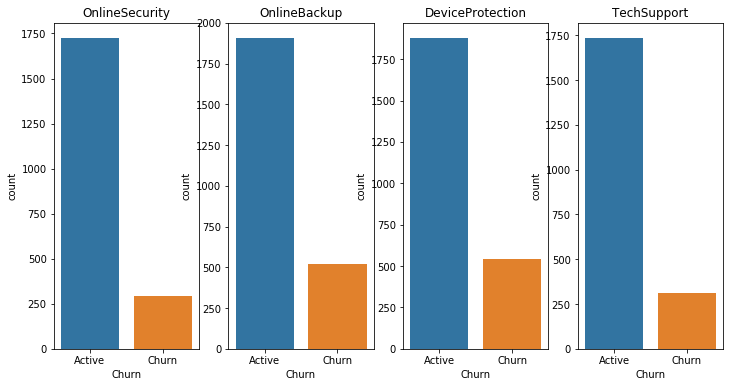

In [195]:
plt.rcParams['figure.figsize'] = (12, 6)

data_1 = df[df['OnlineSecurity'] == 'Yes']
data_2 = df[df['OnlineBackup'] == 'Yes']
data_3 = df[df['DeviceProtection'] == 'Yes']
data_4 = df[df['TechSupport'] == 'Yes']


plt.subplot(1, 4, 1)
sns.countplot(x="Churn", data=data_1)
plt.title('OnlineSecurity')

plt.subplot(1, 4, 2)
sns.countplot(x="Churn", data=data_2)
plt.title('OnlineBackup')

plt.subplot(1, 4, 3)
sns.countplot(x="Churn", data=data_3)
plt.title('DeviceProtection')

plt.subplot(1, 4, 4)
sns.countplot(x="Churn", data=data_4)
plt.title('TechSupport')

#### Effect of StreamingTV, StreamingMovies, Contract on Churn

Text(0.5, 1.0, 'Contract')

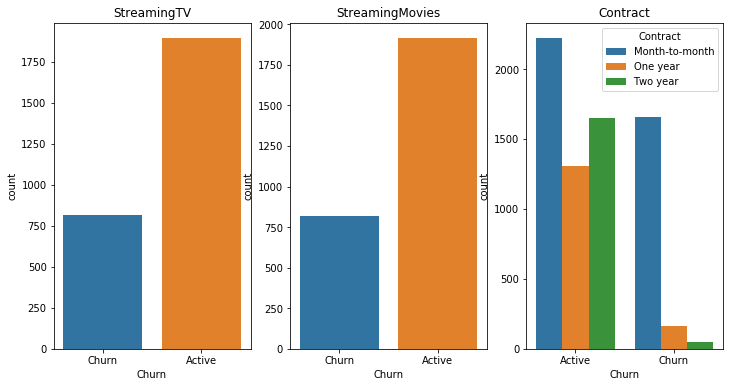

In [196]:
plt.rcParams['figure.figsize'] = (12, 6)

data_1 = df[df['StreamingTV'] == 'Yes']
data_2 = df[df['StreamingMovies'] == 'Yes']

plt.subplot(1, 3, 1)
sns.countplot(x="Churn", data=data_1)
plt.title('StreamingTV')

plt.subplot(1, 3, 2)
sns.countplot(x="Churn", data=data_2)
plt.title('StreamingMovies')

plt.subplot(1, 3, 3)
sns.countplot(x="Churn",hue= 'Contract', data=df)
plt.title('Contract')

#### Effect of PaperlessBilling, PaymentMethod on Churn

Text(0.5, 1.0, 'PaymentMethod')

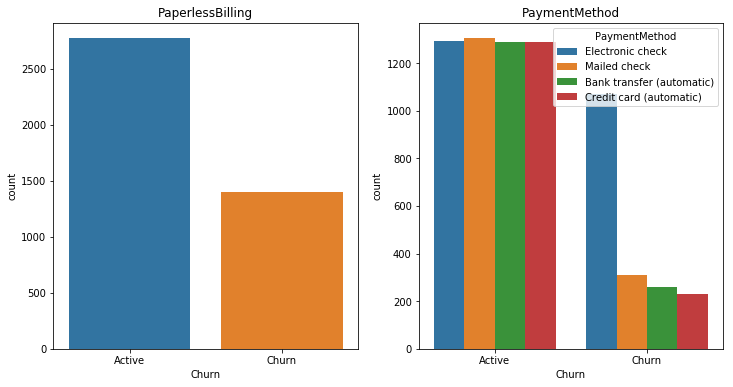

In [198]:
plt.rcParams['figure.figsize'] = (12, 6)

data_1 = df[df['PaperlessBilling'] == 'Yes']

plt.subplot(1, 2, 1)
sns.countplot(x="Churn", data=data_1)
plt.title('PaperlessBilling')

plt.subplot(1, 2, 2)
sns.countplot(x="Churn",hue = 'PaymentMethod', data=df)
plt.title('PaymentMethod')

#### Effect of Monthly Charges and Total Charges on Churn

Total charges is of data type object, to find all the rows with string values below is the process

In [199]:
a = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [200]:
idx = a.isna()

In [201]:
df[idx]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,Active
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,Active
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,Active
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,Active
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,Active
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,Active
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,Active
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,Active
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,Active
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,Active


In [202]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

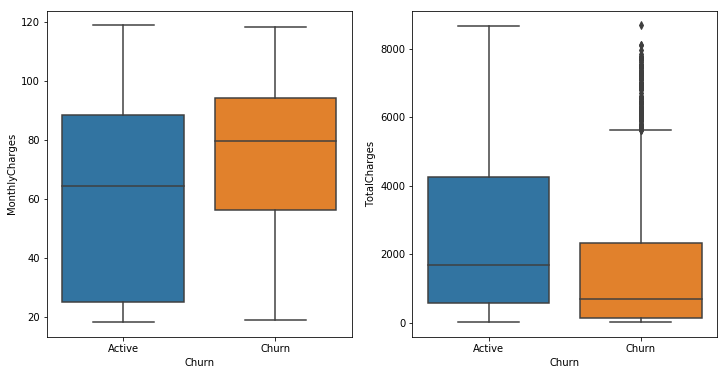

In [203]:
plt.rcParams['figure.figsize'] = (12, 6)

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y="MonthlyCharges", data=df)

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y="TotalCharges", data=df)

In [204]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [205]:
df['TotalCharges'].fillna(value=df['TotalCharges'].median(),inplace=True)

In [206]:
## Replace yes and No in the Churn column to 1 and 0. 1 for the event and 0 for the censured data.
df['Churn']=df['Churn'].apply(lambda x: 1 if x == 'Churn' else 0 )

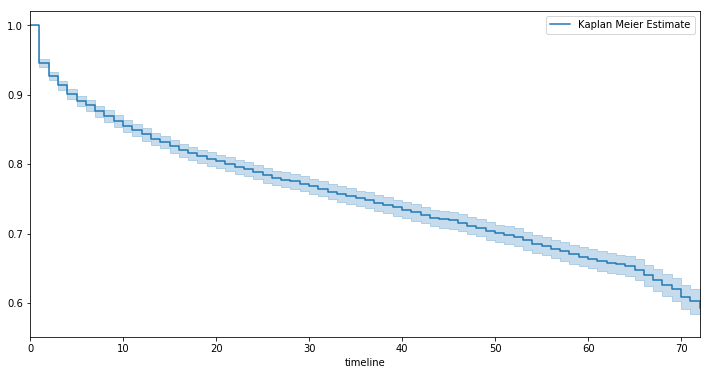

In [147]:
# Lets create an overall KaplanMeier curve, without breaking it into groups of covariates.

## Import the library
from lifelines import KaplanMeierFitter


durations = df['tenure'] ## Time to event data of censored and event data
event_observed = df['Churn']  ## It has the churned (1) and censored is (0)

## create a kmf object as km
km = KaplanMeierFitter() ## instantiate the class to create an object

## Fit the data into the model
km.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
km.plot()

#### Cohort Analysis

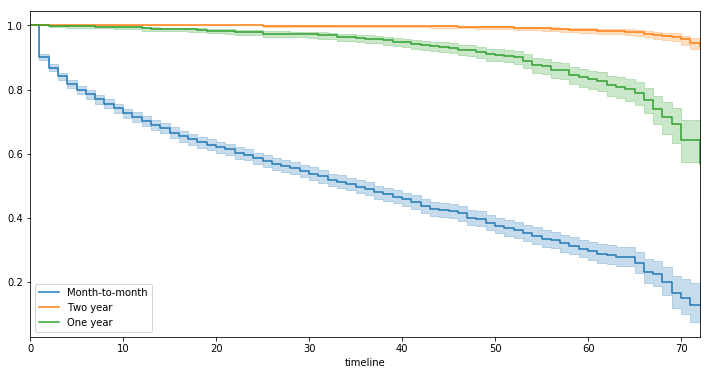

In [148]:
kmf = KaplanMeierFitter() 


T = df['tenure']     ## time to event
E = df['Churn']      ## event occurred or censored


groups = df['Contract']             ## Create the cohorts from the 'Contract' column
ix1 = (groups == 'Month-to-month')   ## Cohort 1
ix2 = (groups == 'Two year')         ## Cohort 2
ix3 = (groups == 'One year')         ## Cohort 3


kmf.fit(T[ix1], E[ix1], label='Month-to-month')    ## fit the cohort 1 data
ax = kmf.plot()


kmf.fit(T[ix2], E[ix2], label='Two year')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)


kmf.fit(T[ix3], E[ix3], label='One year')        ## fit the cohort 3 data
kmf.plot(ax=ax1)                                 ## Plot the KM curve for three cohort on same x and y axis

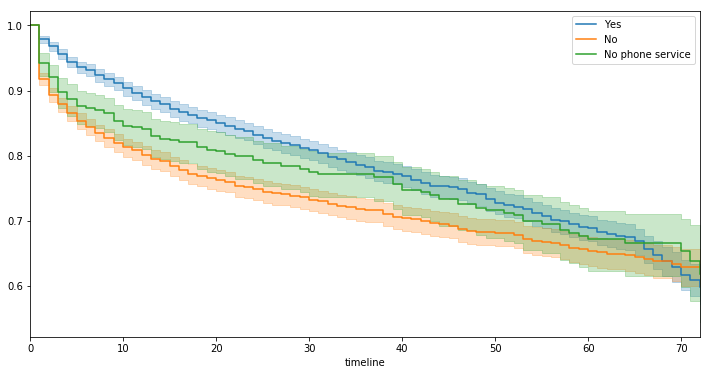

In [149]:
kmf = KaplanMeierFitter() 


T = df['tenure']     ## time to event
E = df['Churn']      ## event occurred or censored


groups = df['MultipleLines']             ## Create the cohorts from the 'Contract' column
ix1 = (groups == 'Yes')   ## Cohort 1
ix2 = (groups == 'No')         ## Cohort 2
ix3 = (groups == 'No phone service')         ## Cohort 3


kmf.fit(T[ix1], E[ix1], label='Yes')    ## fit the cohort 1 data
ax = kmf.plot()


kmf.fit(T[ix2], E[ix2], label='No')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)


kmf.fit(T[ix3], E[ix3], label='No phone service')        ## fit the cohort 3 data
kmf.plot(ax=ax1)                                 ## Plot the KM curve for three cohort on same x and y axis

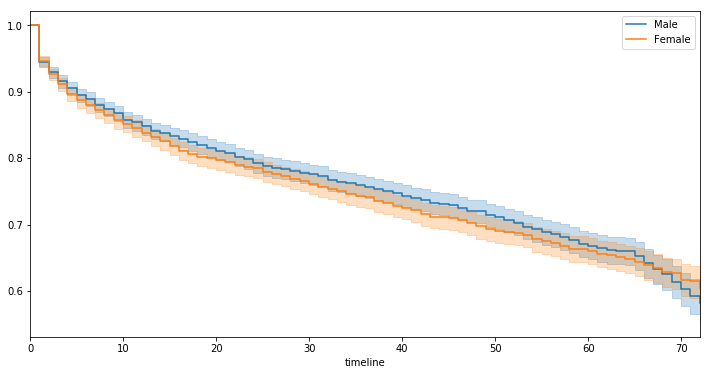

In [170]:
kmf = KaplanMeierFitter() 


T = df['tenure']     ## time to event
E = df['Churn']      ## event occurred or censored


groups = df['gender']             ## Create the cohorts from the 'Contract' column
ix1 = (groups == 'Male')   ## Cohort 1
ix2 = (groups == 'Female')         ## Cohort 2



kmf.fit(T[ix1], E[ix1], label='Male')    ## fit the cohort 1 data
ax = kmf.plot()


kmf.fit(T[ix2], E[ix2], label='Female')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)

#### Log rank Test

It is a statistical method that is used in order to compare survival functions between different populations. One strong assumption that this statistical method includes is the assumption of proportional hazards as we mentioned before, in other words if the survival function cross then it is possible to develop no significant results from the log rank test. It is a non parametric method and deals with right censoring.The power of the logrank test depends on the number of observed failures rather than the sample sizes

#### Log Rank and Cox regression assumptions:

The main assumption is the proportional hazards assumption, according to which the hazard ratio should be constant throughout the study period. The proportional hazards assumption and hazard ratio are also important for the Cox proportional regression model. 

In [166]:
group1 = df[df['StreamingMovies']== 'Yes']   
group2 = df[df['StreamingMovies']== 'No']

T1 = group1['tenure']
E1 = group1['Churn']

T2 = group2['tenure']
E2 = group2['Churn']


#logrank_test
from lifelines.statistics import logrank_test
results=logrank_test(T1,T2, event_observed_A=E1, event_observed_B=E2)
results.print_summary()

Log Rank Test.We will compare the survival distributions of the yes and the no using the most famous statistical method which is log rank test.Need to mention that the results indicate statistic equal to 16.79 and p-value < 0.005 (below the 0.01 level)is statistical significant which denotes that we have to regret null hypothesis and to extract the information that survival functions are significantly different.

In [168]:
group1 = df[df['gender']== 'Male']   
group2 = df[df['gender']== 'Female']

T1 = group1['tenure']
E1 = group1['Churn']

T2 = group2['tenure']
E2 = group2['Churn']


#logrank_test
from lifelines.statistics import logrank_test
results=logrank_test(T1,T2, event_observed_A=E1, event_observed_B=E2)
results.print_summary()

### Cox Proportional Hazard Model

In [150]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [151]:
df.set_index('customerID', inplace = True)

In [152]:
df_1 = df[['tenure','Churn','gender','Partner','Dependents','PhoneService','MonthlyCharges','SeniorCitizen','StreamingTV']]

In [153]:
df_2 = pd.get_dummies(df_1, drop_first=True)

In [154]:
df_2.head()

,tenure,Churn,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
customerID,,,,,,,,,,
7590-VHVEG,1,0,29.85,0,0,1,0,0,0,0
5575-GNVDE,34,0,56.95,0,1,0,0,1,0,0
3668-QPYBK,2,1,53.85,0,1,0,0,1,0,0
7795-CFOCW,45,0,42.30,0,1,0,0,0,0,0
9237-HQITU,2,1,70.70,0,0,0,0,1,0,0


#### Cox proportional hazards regression model:

The Cox proportional hazards regression model is based on two assumptions: First the survival function is an exponential function and second is what we mentioned before. In other words, the hazard ratio is a constant (HR = λ), and the survival function at any given point in time is expressed as an exponential function of the hazard ratio :s(t) = exp(−λt ). Needless to say that assumptions required for any sort of regression analysis, such as continuity of variables and absence of interactions between variables.

In [155]:
from lifelines import CoxPHFitter

In [156]:
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df_2, 'tenure', event_col='Churn')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

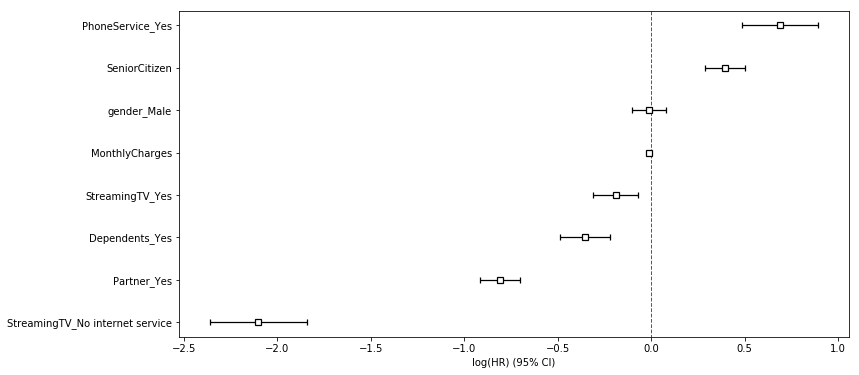

In [157]:
cph.plot()

In [158]:
## We want to see the Survival curve at the customer level. Therefore, we have selected 6 customers (rows 5 till 9).

tr_rows = df_2.iloc[5:10, 2:]
tr_rows

,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
customerID,,,,,,,,
9305-CDSKC,99.65,0,0,0,0,1,0,1
1452-KIOVK,89.10,0,1,0,1,1,0,1
6713-OKOMC,29.75,0,0,0,0,0,0,0
7892-POOKP,104.80,0,0,1,0,1,0,1
6388-TABGU,56.15,0,1,0,1,1,0,0


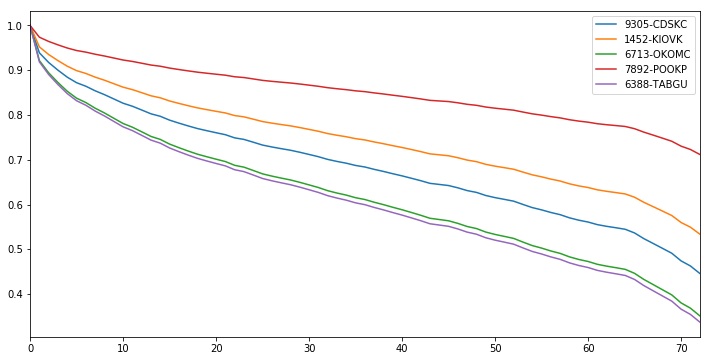

In [159]:
## Customers can be identified with the help of the number mentioned against each curve.
cph.predict_survival_function(tr_rows).plot()

### Concordance Index

Like developing any predictive model it is essential to validate the performance of survival model using appropriate performance measures. Although a number of such measures have been proposed, the one we used is something called the concordance index. Essentially it’s measuring the ordered pairs and how well that you’d managed to order each possible pair in our data set.

For example, we put all of our data and that all of the predictions for the expected time that would get people going to be a customer which obviously going to greater than 0. The scoring for the concordance index is the same way as the area under the curve (AUC) score. It’s in reality somewhere between 0.5 and 1, not 0.5 would be the same as if we just, you know, completely randomly put everything on the board one would be a perfect ordering of everybody in the path they were obviously the closer to 1 the more accurate that your model is

In [173]:
from lifelines.utils import concordance_index

concordance_index(df_2['tenure'], -cph.predict_partial_hazard(df_2), df_2['Churn'])

0.7108934441098411

Concardance Index

1. Random Predictions: 0.5
2. Perfect Concordance: 1.0
3. Perfect Anti-Concordance: 0.0 (in this case we should multiply the predictions by -1 to get a perfect 1.0)

Usually, the fitted models have a concordance index between 0.55 and 0.7 which is due to the noise present in the data.

### References

https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix

https://towardsdatascience.com/survival-analysis-part-a-70213df21c2e

https://towardsdatascience.com/survival-analysis-to-understand-customer-retention-e3724f3f7ea2

http://dmkd.cs.vt.edu/TUTORIAL/Survival/Slides.pdf